In [4]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import scipy.stats
from cmcrameri import cm


In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits import axes_grid1

def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)

In [6]:
datadir = '/Users/andrew/Documents/Data/Merdith_sub_zones/'
figuredir = '/Users/andrew/Documents/scripts_output/serpentinte_subduction_zones/'
#some densities
perid_density_g_cm3 = 3.3 #g/cm3
perid_density_g_km3 = perid_density_g_cm3 * 100000**3
perid_density_kg_km3 = perid_density_g_km3 * 1e-3

In [58]:
with open('%ssubduction_tracks_20210419.pickle' % datadir, 'rb') as f:
    tracks = pickle.load(f)
    
#with open('%sanitgorite_tracks_20210419.pickle' % datadir, 'rb') as f:
    #tracks = pickle.load(f)


In [59]:
dips = []
perids = []
SRs = []
age = []
conv = []
vals = []
pressure = []
temp = []

total_sub_vals_per_Ma = []
mean_dip = []
STD_dip = []
mean_age = []
for track in tracks:
    tmp_df = track[(track['sub_time'] <= 6)
                  #&(track['age'] >= 120)]
                  &(track['temp'] > 0)
                  &(track['temp'] < 650)
                  &(track['pressure'] > 0.1)
                  &(track['pressure'] <7)]
    vals.append(tmp_df['perid_volume'].values)
    dips.append(tmp_df['dip'].values)
    perids.append(tmp_df['peridotite'].values*tmp_df['slab_section_length'].values)
    SRs.append(tmp_df['SR'].values)
    age.append(tmp_df['age'].values)
    conv.append(tmp_df['conv_rate'].values)
    pressure.append(tmp_df['pressure'].values)
    temp.append(tmp_df['temp'].values)
    total_sub_vals_per_Ma.append(np.nansum(tmp_df['peridotite'].values*tmp_df['slab_section_length'].values) \
                                 * 1/(np.max(tmp_df['sub_time'] + 1)))
    mean_dip.append(np.mean(tmp_df['dip']))
    STD_dip.append(np.std(tmp_df['dip']))
    mean_age.append(np.mean(tmp_df['age']))

In [60]:
vals = np.concatenate(vals, axis=0)
dips = np.concatenate(dips, axis=0)
perids = np.concatenate(perids, axis=0)
SRs = np.concatenate(SRs, axis=0)
age = np.concatenate(age, axis=0)
conv = np.concatenate(conv, axis=0)
pressure = np.concatenate(pressure, axis=0)
temp = np.concatenate(temp, axis=0)


perids = perids[np.logical_not(np.isnan(vals))]
dips = dips[np.logical_not(np.isnan(vals))]
SRs = SRs[np.logical_not(np.isnan(vals))]
age = age[np.logical_not(np.isnan(vals))]
conv = conv[np.logical_not(np.isnan(vals))]
pressure =  pressure[np.logical_not(np.isnan(vals))]
temp =  temp[np.logical_not(np.isnan(vals))]
vals = vals[np.logical_not(np.isnan(vals))]


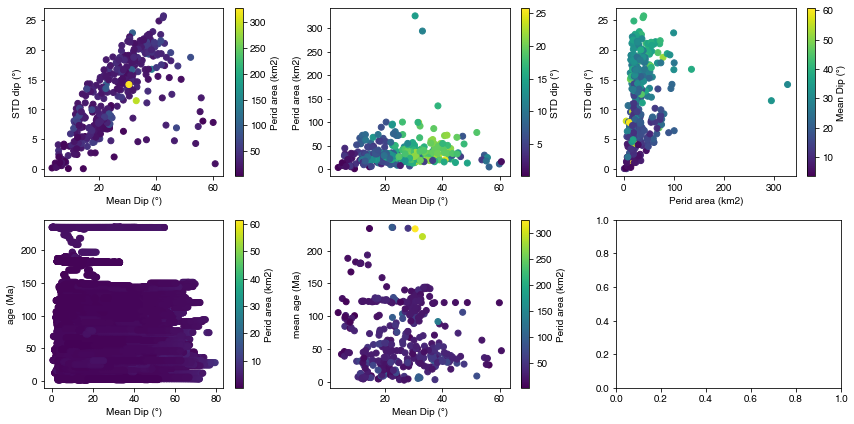

In [61]:
fig, ((ax1, ax2 ,ax3), (ax4, ax5 ,ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(12,6))
cax1 = ax1.scatter(mean_dip, STD_dip, c=total_sub_vals_per_Ma)
cax2 = ax2.scatter(mean_dip, total_sub_vals_per_Ma, c=STD_dip)
cax3 = ax3.scatter(total_sub_vals_per_Ma, STD_dip, c=mean_dip)
cax4 = ax4.scatter(dips, age, c=perids)
cax5 = ax5.scatter(mean_dip, mean_age, c=total_sub_vals_per_Ma)
ax1.set_xlabel('Mean Dip (°)')
ax2.set_xlabel('Mean Dip (°)')
ax3.set_xlabel('Perid area (km2)')
ax4.set_xlabel('Mean Dip (°)')
ax5.set_xlabel('Mean Dip (°)')
ax1.set_ylabel('STD dip (°)')
ax2.set_ylabel('Perid area (km2)')
ax3.set_ylabel('STD dip (°)')
ax4.set_ylabel('age (Ma)')
ax5.set_ylabel('mean age (Ma)')
fig.colorbar(cax1, ax=ax1, label='Perid area (km2)')
fig.colorbar(cax2, ax=ax2, label='STD dip (°)')
fig.colorbar(cax3, ax=ax3, label='Mean Dip (°)')
fig.colorbar(cax4, ax=ax4, label='Perid area (km2)')
fig.colorbar(cax5, ax=ax5, label='Perid area (km2)')
fig.tight_layout()

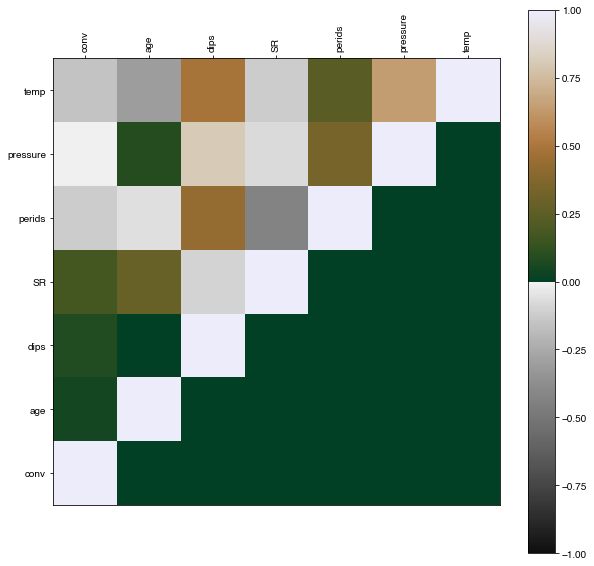

In [62]:
####### correlation coefficient ##########

cov_mat = np.corrcoef(np.vstack((conv, age, dips, SRs, perids, pressure, temp)))

lab=['conv', 'age', 'dips','SR','perids', 'pressure', 'temp']
matrix_length = len(lab)

for i in range(0,matrix_length):
    cov_mat[i,i+1::] = 0
plt.figure(figsize=(10,10))
plt.imshow(cov_mat, interpolation="nearest", cmap=cm.fes,clim=[-1,1])
plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()
plt.xticks(np.arange(0,matrix_length),lab, rotation='vertical')
#plt.xticklabels(lab)
plt.yticks(np.arange(0,matrix_length),lab)
#plt.yticklabels(lab)
plt.colorbar()
#plt.savefig('covariance.pdf')

plt.show()

In [63]:
cov_mat.shape[0]

7

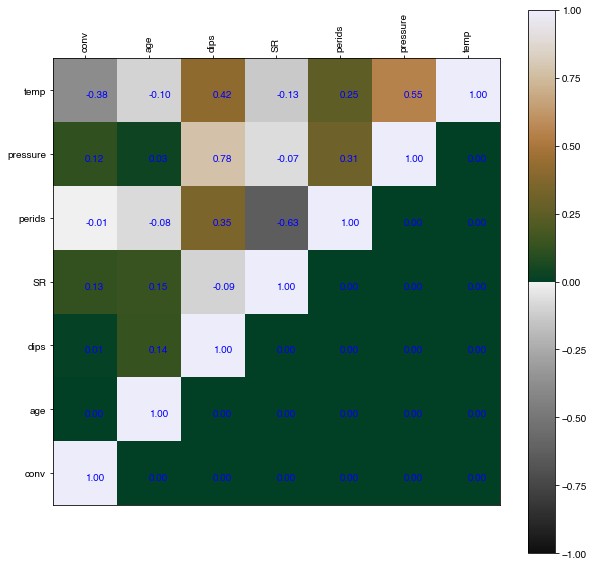

array([[-3.78887625e-01, -9.70201362e-02,  4.21646900e-01,
        -1.28234850e-01,  2.52999972e-01,  5.49316416e-01,
         1.00000000e+00],
       [ 1.20434616e-01,  3.37363903e-02,  7.79434538e-01,
        -6.62418571e-02,  3.09891517e-01,  1.00000000e+00,
         0.00000000e+00],
       [-6.82333691e-03, -7.74256695e-02,  3.53213869e-01,
        -6.31827349e-01,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.27277484e-01,  1.46794520e-01, -9.44477959e-02,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.22946811e-02,  1.38063920e-01,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 7.73343135e-04,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.0000000

In [64]:
####### log correlation coefficient ##########
#need to change 0s in conv to 1
conv_log = conv.copy()
conv_log[conv_log == 0] = 1
cov_mat = np.corrcoef(np.vstack((np.log(age), np.log(conv_log), 
                                 np.log(dips), np.log(SRs), np.log(perids),
                                np.log(pressure), np.log(temp))))
#cov_mat = scipy.stats.spearmanr(np.vstack((np.log(conv), np.log(age), np.log(dips), np.log(SRs), np.log(perids))))

lab=['conv', 'age', 'dips','SR','perids', 'pressure', 'temp']
matrix_length = len(lab)

for i in range(0,matrix_length):
    cov_mat[i,i+1::] = 0
plt.figure(figsize=(10,10))
plt.imshow(cov_mat, interpolation="nearest", cmap=cm.fes,clim=[-1,1])
plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()
plt.xticks(np.arange(0,matrix_length),lab, rotation='vertical')
#plt.xticklabels(lab)
plt.yticks(np.arange(0,matrix_length),lab)
#plt.yticklabels(lab)
plt.colorbar()
#plt.savefig('covariance.pdf')

for y in range(cov_mat.shape[0]):
    for x in range(cov_mat.shape[1]):
        plt.text(x, y, '%.2f' % cov_mat[y,x],
         ha='left',va='top', color='b')
plt.show()
np.flip(cov_mat, axis=0)

/Users/andrew/miniconda3/envs/py377/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/Users/andrew/miniconda3/envs/py377/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


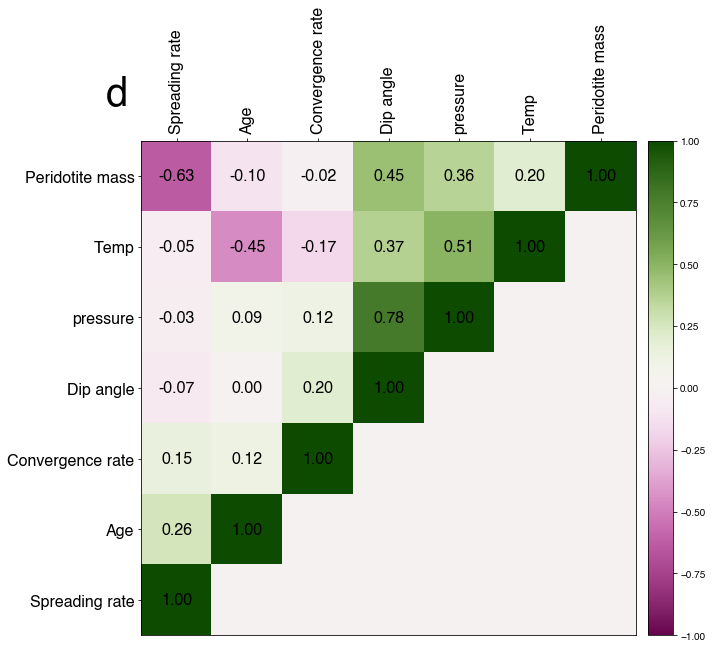

In [53]:
#spearman correlation
df = pd.DataFrame({'SRs': SRs,
                   'age': age,
                   'conv': conv,
                   'dips': dips,
                   'pressure': pressure,
                   'temp': temp,
                   'perids': perids})

corr = df.corr(method = 'spearman')
corr = np.asarray(corr)
lab=['Spreading rate',
     'Age',
     'Convergence rate',
     'Dip angle',
     'pressure',
     'Temp',
     'Peridotite mass']
matrix_length = len(lab)

for i in range(0,matrix_length):
    corr[i,i+1::] = 0
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

im = ax.imshow(np.asarray(corr), cmap=cm.bam,clim=[-1,1], interpolation="nearest",)#, cmap=cm.fes,)
add_colorbar(im)
fig.gca().invert_yaxis()
fig.gca().xaxis.tick_top()
ax.set_xticks(np.arange(0,matrix_length))
ax.set_xticklabels(lab, Rotation='vertical', fontsize=16)
ax.set_yticks(np.arange(0,matrix_length))
ax.set_yticklabels(lab, Rotation='horizontal', fontsize=16)
for y in range(corr.shape[0]):
    for x in range(corr.shape[1]):
#        print(corr[x,y])
        if corr[y,x] == 0.0:
            continue
        else:
            ax.text(x, y, '%.2f' % corr[y,x], ha='center',va='center',
             color='k', fontsize=16)
ax.text(-1,7,'d', fontsize=40)
fig.tight_layout()
#plt.savefig('%sSpearman_coeff.pdf' % figuredir)
#np.flip(corr, axis=0)

/Users/andrew/miniconda3/envs/py377/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/Users/andrew/miniconda3/envs/py377/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


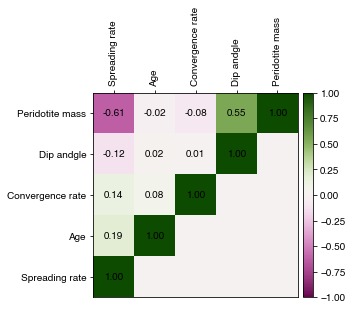

In [19]:
#spearman correlation
df = pd.DataFrame({'SRs': SRs,
                   'age': age,
                   'conv': conv,
                   'dips': dips,
                   'perids': perids})

corr = df.corr(method = 'spearman')
corr = np.asarray(corr)

for i in range(0,5):
    corr[i,i+1::] = 0
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

lab=['Spreading rate',
     'Age',
     'Convergence rate',
     'Dip andgle',
     'Peridotite mass']
im = ax.imshow(np.asarray(corr), cmap=cm.bam,clim=[-1,1], interpolation="nearest",)#, cmap=cm.fes,)
add_colorbar(im)
fig.gca().invert_yaxis()
fig.gca().xaxis.tick_top()
ax.set_xticks(np.arange(0,5))
ax.set_xticklabels(lab, Rotation='vertical')
ax.set_yticks(np.arange(0,5))
ax.set_yticklabels(lab, Rotation='horizontal')
for y in range(corr.shape[0]):
    for x in range(corr.shape[1]):
#        print(corr[x,y])
        if corr[y,x] == 0.0:
            continue
        else:
            ax.text(x, y, '%.2f' % corr[y,x], ha='center',va='center',
             color='k')

fig.tight_layout()
plt.savefig('%sSpearman_coeff.pdf' % figuredir)
#np.flip(corr, axis=0)

/Users/andrew/miniconda3/envs/py377/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/Users/andrew/miniconda3/envs/py377/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


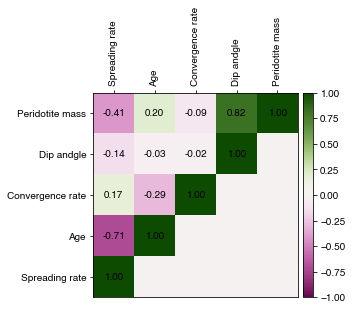

In [20]:
#spearman correlation
df = pd.DataFrame({'SRs': SRs,
                   'age': age,
                   'conv': conv,
                   'dips': dips,
                   'perids': perids})

corr = df.corr(method = 'spearman')
corr = np.asarray(corr)

for i in range(0,5):
    corr[i,i+1::] = 0
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

lab=['Spreading rate',
     'Age',
     'Convergence rate',
     'Dip andgle',
     'Peridotite mass']
im = ax.imshow(np.asarray(corr), cmap=cm.bam,clim=[-1,1], interpolation="nearest",)#, cmap=cm.fes,)
add_colorbar(im)
fig.gca().invert_yaxis()
fig.gca().xaxis.tick_top()
ax.set_xticks(np.arange(0,5))
ax.set_xticklabels(lab, Rotation='vertical')
ax.set_yticks(np.arange(0,5))
ax.set_yticklabels(lab, Rotation='horizontal')
for y in range(corr.shape[0]):
    for x in range(corr.shape[1]):
#        print(corr[x,y])
        if corr[y,x] == 0.0:
            continue
        else:
            ax.text(x, y, '%.2f' % corr[y,x], ha='center',va='center',
             color='k')

fig.tight_layout()
plt.savefig('%sSpearman_coeff.pdf' % figuredir)
#np.flip(corr, axis=0)

In [12]:
'%sabc' % savedir

'/Users/andrew/Documents/scripts_output/serpentinte_subduction_zones/abc'

array([[ 0.13155817, -0.09709426, -0.11483244,  1.        ],
       [ 0.59060443,  0.77817151,  1.        ,  0.        ],
       [ 0.56632581,  1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ]])

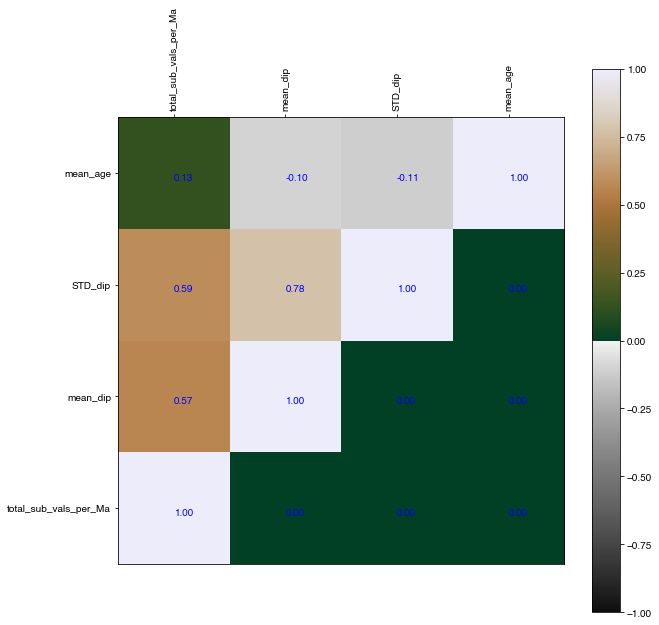

In [13]:
total_sub_vals_per_Ma
mean_dip
STD_dip
mean_age

#spearman correlation
df = pd.DataFrame({'total_sub_vals_per_Ma': total_sub_vals_per_Ma,
                   'mean_dip': mean_dip,
                   'STD_dip': STD_dip,
                   'mean_age': mean_age})

corr = df.corr(method = 'spearman')
corr = np.asarray(corr)

for i in range(0,4):
    corr[i,i+1::] = 0
plt.figure(figsize=(10,10))

lab=['total_sub_vals_per_Ma',
     'mean_dip',
     'STD_dip',
     'mean_age']
plt.imshow(np.asarray(corr),interpolation="nearest", cmap=cm.fes,clim=[-1,1])
plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()
plt.xticks(np.arange(0,4),lab, rotation='vertical')
plt.yticks(np.arange(0,4),lab)
plt.colorbar()
# put labels manually
for y in range(corr.shape[0]):
    for x in range(corr.shape[1]):
        plt.text(x, y, '%.2f' % corr[y,x],
         ha='left',va='top', color='b')
np.flip(corr, axis=0)

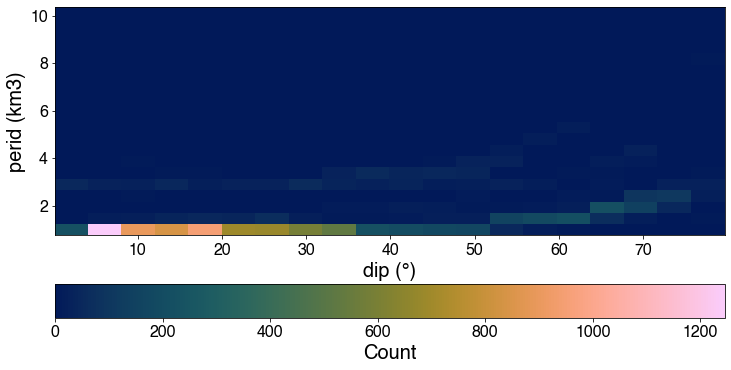

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
hist = ax.hist2d(dips, perids, (20, 20), cmap=cm.batlow)
#ax.set_ylim(0,1000)
ax.set_xlabel('dip (°)', fontsize=20)
ax.set_ylabel('perid (km3)', fontsize=20)
ax.tick_params(axis='both', labelsize=16)

cbar = fig.colorbar(hist[3], ax=ax, orientation='horizontal')
cbar.set_label('Count', fontsize=20)
cbar.ax.tick_params(labelsize=16)

In [15]:
import rockhound as rh
from rockhound.slab2 import ZONES
#all sections
# Fetch all Slab2 subduction zones and add them inside a list
subduction_zones = []
for zone in ZONES:
    subduction_zones.append(rh.fetch_slab2(zone))

In [16]:
subduction_zones[0]['dip'].values.ravel()

array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)

In [17]:
all_dips = []
for zone in subduction_zones:
    all_dips.append(zone['dip'].values.ravel())

In [18]:
all_dips = np.concatenate(all_dips)
all_dips = all_dips[np.logical_not(np.isnan(all_dips))]

[]

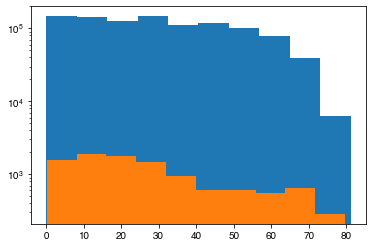

In [19]:
plt.hist(all_dips)
plt.hist(dips)
plt.semilogy()